In [59]:
import networkx as nx
from sage.all import Graph
import time
from decimal import Decimal
import random
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# inputs
graphs = []

q_graph = nx.Graph()
q_graph.add_nodes_from([1,2,3,4,5,6,7,8])
q_graph.add_edges_from([(1,2), (2,3), (2,4), (3,4), (3,5), (4,5), (5,6), (5,7), (6,8), (7,8)])
graphs.append(q_graph)


for i in range(100):
    graphs.append(nx.random_lobster(10, 0.5, 0.2))

for i in range(100):
    graphs.append(nx.random_lobster(100, 0.5, 0.2))
    
for i in range(30):
    graphs.append(nx.random_lobster(1000, 0.5, 0.2))

In [61]:
# Pre processing
def return_max_cliques(G):
    cliques = []
    for clique in nx.find_cliques(G):
        cliques.append(tuple(clique))
    return cliques

def create_graph(cliques):
    G_Prime = nx.Graph()
    G_Prime.add_nodes_from(cliques)
    return G_Prime

def draw(graph):
    nx.draw(graph, with_labels=True)
    
def connect_clique_nodes(G_Prime):
    nodes_prime = list(G_Prime.nodes)
    n = len(nodes_prime)
    for i in range(n-1):
        for j in range(i+1, n):
            if(set(nodes_prime[i]) & set(nodes_prime[j])):
                G_Prime.add_edge(nodes_prime[i], nodes_prime[j])


In [62]:
time_g = []

time_ilp = []

cliques_len = []


for graph in graphs:
    num_nodes = graph.number_of_nodes()
    if num_nodes == 0:
        continue
    
    cliques = return_max_cliques(graph)
    G_Prime = create_graph(cliques)
    connect_clique_nodes(G_Prime)
    
    st_g = time.time()
    colors = nx.coloring.greedy_color(G_Prime, strategy='DSATUR')
    
    et_g = time.time()
    te_g = Decimal(et_g) - Decimal(st_g)
    colors = len(set(colors.values()))
    fd_g = colors/num_nodes
    
    
    # ILP
    ilp_g = Graph(G_Prime)
    st_ilp = time.time()
    n = ilp_g.fractional_chromatic_number()
    et_ilp = time.time()
    te_ilp = Decimal(et_ilp) - Decimal(st_ilp)
    fd_ilp = float(n/num_nodes)
    
    print("Greedy FD = ", fd_g, " ILP FD = ", fd_ilp)
    print("Time Greedy = ", round(te_g, 4), " ILP = ", round(te_ilp, 4))
    print("---------------------")
    time_g.append(te_g)
    time_ilp.append(te_ilp)
    cliques_len.append(len(cliques))
    

Greedy FD =  0.375  ILP FD =  0.375
Time Greedy =  0.0021  ILP =  0.1266
---------------------
Greedy FD =  0.12195121951219512  ILP FD =  0.12195121951219512
Time Greedy =  0.0021  ILP =  0.0145
---------------------
Greedy FD =  0.18518518518518517  ILP FD =  0.18518518518518517
Time Greedy =  0.0009  ILP =  0.0087
---------------------
Greedy FD =  0.14814814814814814  ILP FD =  0.14814814814814814
Time Greedy =  0.0009  ILP =  0.0094
---------------------
Greedy FD =  0.17391304347826086  ILP FD =  0.17391304347826086
Time Greedy =  0.0032  ILP =  0.0174
---------------------
Greedy FD =  0.6666666666666666  ILP FD =  0.6666666666666666
Time Greedy =  0.0  ILP =  0.0
---------------------
Greedy FD =  0.35294117647058826  ILP FD =  0.35294117647058826
Time Greedy =  0.0015  ILP =  0.0125
---------------------
Greedy FD =  0.21052631578947367  ILP FD =  0.21052631578947367
Time Greedy =  0.0018  ILP =  0.0196
---------------------
Greedy FD =  0.8333333333333334  ILP FD =  0.8333333

Greedy FD =  0.26666666666666666  ILP FD =  0.26666666666666666
Time Greedy =  0.0003  ILP =  0.003
---------------------
Greedy FD =  0.19230769230769232  ILP FD =  0.19230769230769232
Time Greedy =  0.0008  ILP =  0.0052
---------------------
Greedy FD =  0.11764705882352941  ILP FD =  0.11764705882352941
Time Greedy =  0.0014  ILP =  0.0078
---------------------
Greedy FD =  0.3333333333333333  ILP FD =  0.3333333333333333
Time Greedy =  0.0004  ILP =  0.004
---------------------
Greedy FD =  0.03260869565217391  ILP FD =  0.03260869565217391
Time Greedy =  0.1026  ILP =  0.1129
---------------------
Greedy FD =  0.13636363636363635  ILP FD =  0.13636363636363635
Time Greedy =  0.005  ILP =  0.0217
---------------------
Greedy FD =  0.023529411764705882  ILP FD =  0.023529411764705882
Time Greedy =  0.2422  ILP =  0.1578
---------------------
Greedy FD =  0.09523809523809523  ILP FD =  0.09523809523809523
Time Greedy =  0.0217  ILP =  0.0488
---------------------
Greedy FD =  0.0446

Greedy FD =  0.03125  ILP FD =  0.03125
Time Greedy =  0.0991  ILP =  0.0654
---------------------
Greedy FD =  0.02650602409638554  ILP FD =  0.02650602409638554
Time Greedy =  0.2085  ILP =  0.093
---------------------
Greedy FD =  0.038314176245210725  ILP FD =  0.038314176245210725
Time Greedy =  0.0829  ILP =  0.0527
---------------------
Greedy FD =  0.021929824561403508  ILP FD =  0.021929824561403508
Time Greedy =  0.2518  ILP =  0.1136
---------------------
Greedy FD =  0.04216867469879518  ILP FD =  0.04216867469879518
Time Greedy =  0.0334  ILP =  0.0367
---------------------
Greedy FD =  0.029333333333333333  ILP FD =  0.029333333333333333
Time Greedy =  0.1664  ILP =  0.0804
---------------------
Greedy FD =  0.027972027972027972  ILP FD =  0.027972027972027972
Time Greedy =  0.0966  ILP =  0.0656
---------------------
Greedy FD =  0.04477611940298507  ILP FD =  0.04477611940298507
Time Greedy =  0.0573  ILP =  0.0447
---------------------
Greedy FD =  0.18181818181818182 

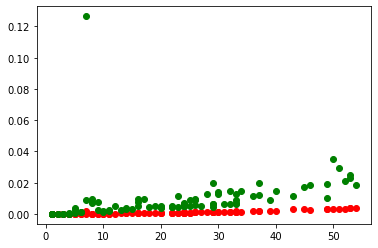

In [63]:
plt.scatter(cliques_len[:90], time_g[:90], color='red')
plt.scatter(cliques_len[:90], time_ilp[:90], color='green')
plt.show()

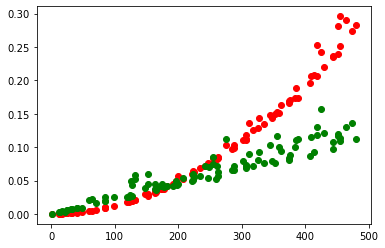

In [64]:
plt.scatter(cliques_len[91:190], time_g[91:190], color='red')
plt.scatter(cliques_len[91:190], time_ilp[91:190], color='green')
plt.show()

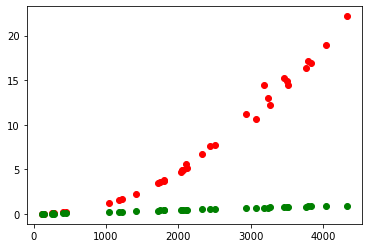

In [65]:
plt.scatter(cliques_len[191:], time_g[191:], color='red')
plt.scatter(cliques_len[191:], time_ilp[191:], color='green')
plt.show()